# Loading our training and testing data

In [37]:
import pandas as pd
import numpy as np

In [219]:
train=pd.read_csv(r'C:\Users\Admin\Desktop\Oracle\train.csv')
test=pd.read_csv(r'C:\Users\Admin\Desktop\Oracle\test.csv')

## Exploring the data

In [40]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [41]:
test.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    2610 non-null   int64 
 1   TweetText  2610 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.9+ KB


There are no missing or NULL values in both the training and the testing data. Therefore, no need for treating them.

In [44]:
train['TweetText']

0       '#SecKerry: The value of the @StateDept and @U...
1                                 '@rraina1481 I fear so'
2       'Watch video highlights of the #wwc13 final be...
3       'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4       '@cricketfox Always a good thing. Thanks for t...
                              ...                        
6520    'Photo: PM has laid a wreath at Martyrs Monume...
6521    'The secret of the Chennai pitch - crumbling o...
6522              @alinabhutto he isn't on Twitter either
6523    'Which England player would you take out to di...
6524    'Dmitry #Medvedev expressed condolences to the...
Name: TweetText, Length: 6525, dtype: object

The tweets above provide an idea about the cleaning needed. It is clear that I would need to remove symbols, tags, hashtags and just to take into consideration elements that may not be apparent in the small sample of tweets I will also include links and integrate more text processing techniques.

# Processing the training data

## Removing hashtags,symbols, stop words and lowercasing the text

In [214]:
#Importing the necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

In [258]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

I have opted for lemmatization since it considers the context and converts the word to its meaningful base form. In addition to that, I have removed stopwords because they are generally considered to carry less significant information.

In [224]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [221]:
def clean_tweet_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = BeautifulSoup(text, "lxml").get_text()
    text = re.sub(r'[^a-z\s]', '', text)
    # The code below tokenizes the text, lemmatizes each word, removes stopwords, and joins the processed words back into a single cleaned text string, enhancing text normalization and relevance for further analysis.
    words = word_tokenize(text)
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return cleaned_text

In [225]:
#Cleaning the training and the testing data
train['Cleanedtext']=train['TweetText'].apply(clean_tweet_text)
test['Cleanedtext']=test['TweetText'].apply(clean_tweet_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8376\1000952633.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


## Exploratory analysis of labels

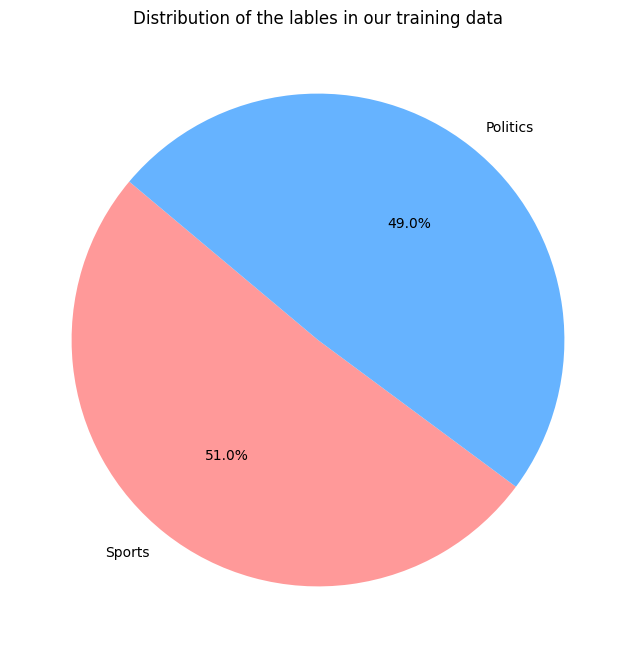

In [259]:
import matplotlib.pyplot as plt

lcounts = train['Label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(lcounts, labels=lcounts.index, autopct='%1.1f%%' , startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of the lables in our training data')
plt.show()

The pie-chart above shows an essentially equal distribution of the categories Sports and Political. Therefore, I won't have to worry about my model being biased and there won't be a need to balance these labels.

## Splitting the training data

In [55]:
!pip install scikit-learn

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train['Cleanedtext'], train['Label'], test_size=0.2, random_state=42)

# Feature Extraction 

## Using TF-IDF vectorization

I chose TF-IDF vectorization because it enhances text processing by highlighting the importance of words based on their frequency in comparison to the ensemble of the text.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
vectorizer = TfidfVectorizer(stop_words='english')

In [229]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test['Cleanedtext'])

In [141]:
#Visualizing the difference between our data before vectorization and afterwards
print(X_train_tfidf,'/n', X_train)

  (0, 9251)	0.2519375741689238
  (0, 6702)	0.2413735784433087
  (0, 1792)	0.36839344831488985
  (0, 1027)	0.3996322785327977
  (0, 6052)	0.3996322785327977
  (0, 9190)	0.27911346524209196
  (0, 7861)	0.3996322785327977
  (0, 6510)	0.3188810738531108
  (0, 2674)	0.2895603248252531
  (2, 8057)	0.37975726900142837
  (2, 8523)	0.36019746625097326
  (2, 7325)	0.4913760506071606
  (2, 5063)	0.4960529182387606
  (2, 3864)	0.48838845312258816
  (3, 7587)	0.4168289721320002
  (3, 4059)	0.4368021416952561
  (3, 3081)	0.34854025434707375
  (3, 2587)	0.382684613239537
  (3, 5107)	0.2526849203498158
  (3, 6170)	0.24559670784510507
  (3, 3281)	0.36271144367628105
  (3, 6566)	0.3343690650178665
  (4, 7325)	0.2455265581842956
  (4, 5886)	0.29626711913343945
  (4, 8193)	0.3478845264011438
  :	:
  (5217, 1714)	0.2669645653822018
  (5217, 4574)	0.28423980115272895
  (5217, 1862)	0.2669645653822018
  (5217, 5731)	0.28423980115272895
  (5217, 3649)	0.25496880027317104
  (5217, 7909)	0.335800766261824
  (52

## Using pre-trained glove embeddings

I have decided to experiment with some advanced text processing techniques. I have used GloVe embeddings which provide dense vector representations that capture semantic relationships and contextual similarities between words.
The GloVe that I've used is especially tailored to tweets which is why makes it most suitable to this study.

In [65]:
# Loading the GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

In [66]:
# Creating embedding matrix
def create_embedding_matrix(texts, embeddings_index, embedding_dim=100):
    embeddings = []
    for text in texts:
        words = text.split()
        word_embeddings = [embeddings_index.get(word, np.zeros(embedding_dim)) for word in words]
        if word_embeddings:
            embeddings.append(np.mean(word_embeddings, axis=0))
        else:
            embeddings.append(np.zeros(embedding_dim))
    return np.array(embeddings)

In [67]:
embedding_dim = 200
embeddings_index = load_glove_embeddings(r'C:\Users\Admin\Desktop\Oracle\glove.twitter.27B.200d.txt')

In [235]:
# Creating embeddings for train, validation, and test data
X_train_embeddings = create_embedding_matrix(X_train, embeddings_index, embedding_dim)
X_val_embeddings = create_embedding_matrix(X_val, embeddings_index, embedding_dim)
X_test_embeddings = create_embedding_matrix(test['Cleanedtext'], embeddings_index, embedding_dim)

# Model training

We will test different classifiers to find the one with the best performance results . I will focus on classifiers that are most known for text classification such as Logistic Regression, Multinomial Naive Bayes, SVM, and Random Forest.

## Logistic regression

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

## Multinomial Naive Bayes

In [290]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

## SVM

In [291]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_tfidf, y_train)

SVC()

## Random forest


In [293]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

# Hyperparameter tuning (using grid search)

I have chosen Grid Search since it improves the accuracy of the models by systematically exploring and identifying the optimal parameter combinations for each of them.

In [282]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', "newton-cg", "liblinear"],
        'max_iter': [100, 1000, 2500, 5000]
    },
    'SVM': {
        'C': np.logspace(-4, 4, 20),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'MultinomialNB': {
        'alpha': np.logspace(-3, 1, 20)
    }
}

In [283]:
models = {
    'LogisticRegression': lr,
    'SVM': svm,
    'RandomForest': rf,
    'MultinomialNB': mnb
}

In [284]:
#Best models using Vectorized data
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    #I have opted for a cross validation of 3, I have also added the verbose and n_jobs parameters to help my Grid Searcher run faster
    clf = GridSearchCV(model, param_grid=param_grids[model_name], cv=3, verbose=True, n_jobs=-1)
    clf.fit(X_train_tfidf, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best Parameters for {model_name}: {clf.best_params_}")
    print(f"Best Score for {model_name}: {clf.best_score_}")

Training LogisticRegression...
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Parameters for LogisticRegression: {'C': 4.281332398719396, 'max_iter': 100, 'solver': 'newton-cg'}
Best Score for LogisticRegression: 0.9122605363984674
Training SVM...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters for SVM: {'C': 1.623776739188721, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for SVM: 0.9151340996168583
Training RandomForest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for RandomForest: 0.8808429118773947
Training MultinomialNB...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for MultinomialNB: {'alpha': 0.04832930238571752}
Best Score for MultinomialNB: 0.921647509578544


## Setting the best parameters for each of the models we tested

In [296]:
lr = LogisticRegression(
    C=4.281332398719396, 
    max_iter=100, 
    solver='newton-cg'
)
svm = SVC(
    C=1.623776739188721, 
    gamma='scale', 
    kernel='rbf'
)
rf = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200
)
mnb = MultinomialNB(
    alpha=0.04832930238571752
)


# Performance evaluation

The elements I chose to highlight the performance of the models are :
    - Accuracy
    - Classification Report
    - Confucion Matrix
They will provide a comprehensive evaluation of their predictive capabilities and give a clearer idea about how the models perform from different aspects.

## Logistic Regression

In [298]:
lr.fit(X_train_tfidf,y_train)
y_val_pred1 = lr.predict(X_val_tfidf)
print(f'Validation Accuracy for vectorized data with LR: {accuracy_score(y_val, y_val_pred1)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred1))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred1,labels=train.Label.unique())
df_cm_lr = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_lr

Validation Accuracy for vectorized data with LR: 0.9134099616858238
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.92      0.91      0.91       638
      Sports       0.91      0.92      0.92       667

    accuracy                           0.91      1305
   macro avg       0.91      0.91      0.91      1305
weighted avg       0.91      0.91      0.91      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,578,60
Sports,53,614


In [299]:
lr.fit(X_train_embeddings,y_train)
y_val_pred2 = lr.predict(X_val_embeddings)
print(f'Validation Accuracy for embedded data with LR: {accuracy_score(y_val, y_val_pred2)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred2))
print('Validation Confusion Matrix:')
cm1=confusion_matrix(y_val, y_val_pred2)
df_cm_lr1 = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_lr1

Validation Accuracy for embedded data with LR: 0.9264367816091954
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.93      0.92      0.92       638
      Sports       0.92      0.93      0.93       667

    accuracy                           0.93      1305
   macro avg       0.93      0.93      0.93      1305
weighted avg       0.93      0.93      0.93      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,578,60
Sports,53,614


## Multinomial Naive Bayes

In [302]:
mnb.fit(X_train_tfidf,y_train)
y_val_pred3 = mnb.predict(X_val_tfidf)
print(f'Validation Accuracy with MNB: {accuracy_score(y_val, y_val_pred3)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred3))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred3,labels=train.Label.unique())
df_cm_mnb = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_mnb

Validation Accuracy with MNB: 0.9226053639846743
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.93      0.91      0.92       638
      Sports       0.92      0.93      0.92       667

    accuracy                           0.92      1305
   macro avg       0.92      0.92      0.92      1305
weighted avg       0.92      0.92      0.92      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,582,56
Sports,45,622


## SVM classifier

In [303]:
svm.fit(X_train_tfidf,y_train)
y_val_pred4 = svm.predict(X_val_tfidf)
print(f'Validation Accuracy for vectorized data with SVM: {accuracy_score(y_val, y_val_pred4)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred4))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred4,labels=train.Label.unique())
df_cm_svm = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_svm

Validation Accuracy for vectorized data with SVM: 0.9187739463601533
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.92      0.91      0.92       638
      Sports       0.91      0.93      0.92       667

    accuracy                           0.92      1305
   macro avg       0.92      0.92      0.92      1305
weighted avg       0.92      0.92      0.92      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,580,58
Sports,48,619


In [304]:
svm.fit(X_train_embeddings,y_train)
y_val_pred5 = svm.predict(X_val_embeddings)
print(f'Validation Accuracy for embedded data with SVM: {accuracy_score(y_val, y_val_pred5)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred5))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred5,labels=train.Label.unique())
df_cm_svm1 = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_svm1

Validation Accuracy for embedded data with SVM: 0.9272030651340997
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.94      0.91      0.92       638
      Sports       0.92      0.94      0.93       667

    accuracy                           0.93      1305
   macro avg       0.93      0.93      0.93      1305
weighted avg       0.93      0.93      0.93      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,580,58
Sports,37,630


## Random forest

In [305]:
rf.fit(X_train_tfidf,y_train)
y_val_pred6 = rf.predict(X_val_tfidf)
print(f'Validation Accuracy for vectorized data with RFC: {accuracy_score(y_val, y_val_pred6)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred6))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred5,labels=train.Label.unique())
df_cm_rf1 = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_rf1

Validation Accuracy for vectorized data with RFC: 0.8973180076628352
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.94      0.85      0.89       638
      Sports       0.87      0.95      0.90       667

    accuracy                           0.90      1305
   macro avg       0.90      0.90      0.90      1305
weighted avg       0.90      0.90      0.90      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,580,58
Sports,37,630


In [306]:
rf.fit(X_train_embeddings,y_train)
y_val_pred7 = rf.predict(X_val_embeddings)
print(f'Validation Accuracy for embedded data with RFC: {accuracy_score(y_val, y_val_pred7)}')
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred7))
print('Validation Confusion Matrix:')
cm=confusion_matrix(y_val, y_val_pred5,labels=train.Label.unique())
df_cm_rf = pd.DataFrame(cm, index=train.Label.unique(), columns=train.Label.unique())
df_cm_rf

Validation Accuracy for embedded data with RFC: 0.9172413793103448
Validation Classification Report:
              precision    recall  f1-score   support

    Politics       0.94      0.89      0.91       638
      Sports       0.90      0.94      0.92       667

    accuracy                           0.92      1305
   macro avg       0.92      0.92      0.92      1305
weighted avg       0.92      0.92      0.92      1305

Validation Confusion Matrix:


,Politics,Sports
Politics,580,58
Sports,37,630


The models, whether fitted to embedded data or vectorized data, gave quite similar performances with a few performing slightly better : 

    -The confusion matrix indicated that the models perform relatively well, with a significantly higher number of correct classifications compared to misclassifications, suggesting a reasonable level of accuracy in distinguishing between politics and sports categories.
    -The validation classification report demonstrates high precision and recall for both politics and sports classes, indicating strong performance in distinguishing between the two categories. The macro and weighted average F1-scores highlight the robustness of the model's predictive capabilities across the entire dataset.

However,the svm classifier returned the best accuracy results when fitted to the embedded data. It is what I have used to predict the labels for the test data and save my results.

## Predicting on the testing data

In [310]:
test1=test.drop(columns=['TweetText','Cleanedtext'])
test1['Label']=svm.predict(X_test_embeddings)
test1.to_csv('C:\\Users\\Admin\\Desktop\\Oracle\\final1.csv',index=False)

# Aspirations for improving the code

Had I had the luxury of having more time I would have loved to try out more approaches such as : 

 1-Testing out deep learning models such as BERT and LSTMs.
 2-Trying a KNN-GCN by implementing it from scratch.
 3-Integrating different text processing techniques and experimenting with them.
 4-Improving the models I used in this notebook by testing the impact of each of the parameters on a deeper level.

Overall, I would have enjoyed experimenting more with the models to improve their performance and give better results.

# KNN-GCN

## Constructing the graph using KNN

In [85]:
from sklearn.neighbors import kneighbors_graph

In [87]:
adjacency_matrix = kneighbors_graph(X_train_tfidf, n_neighbors=5, mode='connectivity', include_self=True)
adj = adjacency_matrix.toarray()

## Defining the GCN model

In [89]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from spektral.layers import GCNConv

In [90]:
class MyGCN(Model):
    def __init__(self, n_labels):
        super().__init__()
        self.conv1 = GCNConv(16, activation='relu')
        self.conv2 = GCNConv(n_labels, activation='softmax')
    
    def call(self, inputs):
        x, adj = inputs
        x = self.conv1([x, adj])
        x = self.conv2([x, adj])
        return x

In [154]:
# Preparing the feature matrix and adjacency matrix
X_val1 = np.array(X_val_tfidf)
X_train1 = np.array(X_train_tfidf)
adj = np.array(adj, dtype=np.float32)

In [159]:
# Convert sparse TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()

X_train_dense
X_val_dense 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
# Check the dense arrays against the original TF-IDF matrices
print("\nComparison between X_train_dense and original TF-IDF matrix for X_train:")
print(np.allclose(X_train_dense, X_train_tfidf.toarray()))

print("\nComparison between X_val_dense and original TF-IDF matrix for X_val:")
print(np.allclose(X_val_dense, X_val_tfidf.toarray()))



Comparison between X_train_dense and original TF-IDF matrix for X_train:
True

Comparison between X_val_dense and original TF-IDF matrix for X_val:
True


In [100]:
# Defining the model
n_labels = 2  # Number of classes
gcn_model = MyGCN(n_labels)
gcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
print("X_train1 shape:", X_train_tfidf.shape)
print("X_val1 shape:", X_val_tfidf.shape)
print("adj shape:", adj.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train1 shape: (5220, 9704)
X_val1 shape: (1305, 9704)
adj shape: (5220, 5220)
y_train shape: (5220,)
y_val shape: (1305,)


In [158]:
# Training the model
gcn_model.fit([X_train_dense, adj], y_train, epochs=10, batch_size=32,  validation_data=([X_val_dense, adj], y_val))

Epoch 1/10


AttributeError: 'NoneType' object has no attribute 'items'

# BERT

## Importing the necessary libraries

In [72]:
!pip install tensorflow_hub
!pip install keras tf-models-official pydot graphviz

  Using cached tf_models_official-2.16.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pydot-2.0.0-py3-none-any.whl.metadata (9.6 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached Cython-3.0.10-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached google_api_python_client-2.130.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached kaggle-1.6.14.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      running egg_info
      writing lib3\PyYAML.egg-info\PKG-INFO
      writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
      writing top-level names to lib3\PyYAML.egg-info\top_level.txt
      Traceback (most recent call last):
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_proce

In [73]:
import os

import tensorflow as tf
import tensorflow_hub as hub

In [34]:
from tensorflow.keras.utils import to_categorical

In [36]:
!pip install tensorflow-models

ERROR: Could not find a version that satisfies the requirement tensorflow-models (from versions: none)
ERROR: No matching distribution found for tensorflow-models


In [75]:
!pip install tf-models-official

  Using cached tf_models_official-2.16.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached Cython-3.0.10-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached google_api_python_client-2.130.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached kaggle-1.6.14.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pycocotools-2.0.7.tar.gz (24 kB)
  Installing build dependencies: started
  Install

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      running egg_info
      writing lib3\PyYAML.egg-info\PKG-INFO
      writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
      writing top-level names to lib3\PyYAML.egg-info\top_level.txt
      Traceback (most recent call last):
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_proce

In [76]:
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization as tokenization

from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

ModuleNotFoundError: No module named 'official'

In [29]:
!C:\Users\Admin\AppData\Local\Programs\Python\Python312\python --version

Python 3.12.3
